In [ ]:
import pandas as pd
import os
import glob
import numpy as np
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

combined_hc_data = pd.read_csv('/Users/martinli/Desktop/SZ/combined_hc_data.csv', index_col=0)
combined_uc_data = pd.read_csv('/Users/martinli/Desktop/SZ/combined_uc_data.csv', index_col=0)
combined_full_data = pd.concat([combined_hc_data, combined_uc_data], axis=1, join = "outer")

In [5]:
combined_full_data = combined_full_data.apply(pd.to_numeric, errors='coerce')
combined_full_data.dropna(axis=0, how='any', inplace=True)
combined_full_data.shape
combined_full_data.head()

,GSM2932807,GSM2932808,GSM2932809,GSM2932810,GSM2932811,GSM2932812,GSM2932813,GSM2932814,GSM2932815,GSM2932816,...,GSM3316836,GSM3316837,GSM3316838,GSM3316839,GSM3316840,GSM3316841,GSM3316842,GSM3316843,GSM3316844,GSM3316845
0,,,,,,,,,,,,,,,,,,,,,
5S,3.6387,1.71650,1.5406,0.01000,0.01000,0.01000,2.26220,4.2801,5.64640,3.65850,...,0.0100,0.0100,0.0100,0.0100,0.0100,0.01000,0.0100,0.0100,0.0100,0.0100
5,0.0100,0.01000,0.0100,0.01000,0.01000,0.01000,0.01000,0.0100,0.01000,0.01000,...,0.0100,0.0100,0.0100,0.0100,0.0100,0.01000,0.0100,0.0100,0.0100,0.0100
7SK,0.0100,0.92919,0.0100,0.35525,0.01000,0.01000,0.01000,0.0100,0.01000,0.33258,...,0.0100,0.0100,0.0100,0.0100,0.0100,0.45446,0.0100,0.0100,0.0100,0.0100
A1BG-AS1,1.2498,0.98933,0.6026,0.60026,0.41022,0.87175,0.42899,0.5787,0.42655,0.52162,...,2.0132,1.9566,2.8474,1.6053,2.2664,1.81180,4.9318,2.7266,1.3287,1.9345
A1BG,3.2298,7.34170,5.2408,2.55530,1.62650,2.67920,2.79010,2.7155,2.23050,2.40190,...,5.8525,4.2491,15.6315,4.5514,5.5206,14.52720,13.4168,7.2825,3.6846,6.1163


In [6]:
# Checking for overlapping columns
hc_columns = set(combined_hc_data.columns)
uc_columns = set(combined_uc_data.columns)
overlapping_columns = hc_columns.intersection(uc_columns)
print("Overlapping columns:", len(overlapping_columns))
print(overlapping_columns)

# Verify unique columns
combined_full_data = pd.concat([combined_hc_data, combined_uc_data], axis=1, join="outer")
unique_columns_combined = combined_full_data.shape[1]
unique_columns_expected = len(hc_columns) + len(uc_columns) - len(overlapping_columns)
print("Unique columns in combined dataframe:", unique_columns_combined)
print("Expected unique columns:", unique_columns_expected)
print("Full data shape", combined_full_data.shape)

# Splitting the combined data on the batch
batch = [1 if col.startswith('GSM2') else 2 for col in combined_full_data.columns]
batch1_data = combined_full_data.loc[:, [col for col, b in zip(combined_full_data.columns, batch) if b == 1]]
batch2_data = combined_full_data.loc[:, [col for col, b in zip(combined_full_data.columns, batch) if b == 2]]

#shape of each batch
print("Batch 1 data shape:", batch1_data.shape)
print("Batch 2 data shape:", batch2_data.shape)
print("hc_columns", len(hc_columns))
print("uc_columns", len(uc_columns))

Overlapping columns: 0
set()
Unique columns in combined dataframe: 320
Expected unique columns: 320
Full data shape (58526, 320)
Batch 1 data shape: (58526, 222)
Batch 2 data shape: (58526, 98)
hc_columns 74
uc_columns 246


In [7]:
combined_full_data = combined_full_data.apply(pd.to_numeric, errors='coerce')
nan_counts = combined_full_data.isna().sum().sum()
print(f"Total NaN values in the dataset: {nan_counts}")
combined_full_data.dropna(inplace=True)
print(combined_full_data.dtypes)
print(combined_full_data.shape)

Total NaN values in the dataset: 640
GSM2932807    float64
GSM2932808    float64
GSM2932809    float64
GSM2932810    float64
GSM2932811    float64
               ...   
GSM3316841    float64
GSM3316842    float64
GSM3316843    float64
GSM3316844    float64
GSM3316845    float64
Length: 320, dtype: object
(58524, 320)


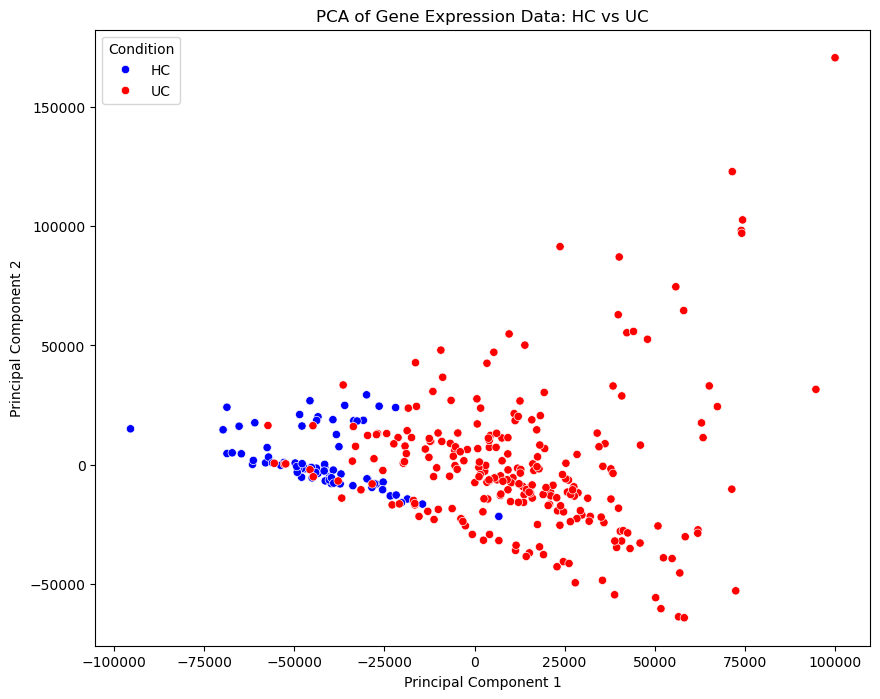

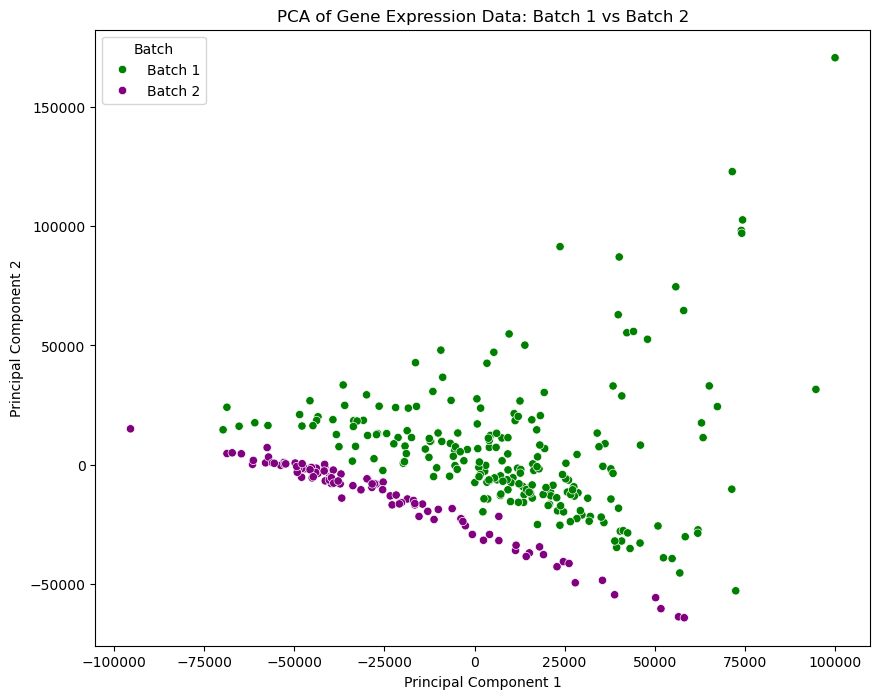

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_full_data.T)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Sample'] = combined_full_data.columns
pca_df['Condition'] = ['HC' if col in hc_columns else 'UC' for col in combined_full_data.columns]
pca_df['Batch'] = ['Batch 1' if col.startswith('GSM2') else 'Batch 2' for col in combined_full_data.columns]

# HC vs UC
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Condition', data=pca_df, palette=['blue', 'red'])
plt.title('PCA of Gene Expression Data: HC vs UC')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Condition')
plt.show()

# Batch 1 vs Batch 2
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Batch', data=pca_df, palette=['green', 'purple'])
plt.title('PCA of Gene Expression Data: Batch 1 vs Batch 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Batch')
plt.show()

In [8]:
import warnings
warnings.filterwarnings("ignore")
from combat.pycombat import pycombat
df_corrected = pycombat(combined_full_data, batch)
scaled_combined_data = df_corrected

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


Before the Batch Effect was removed:

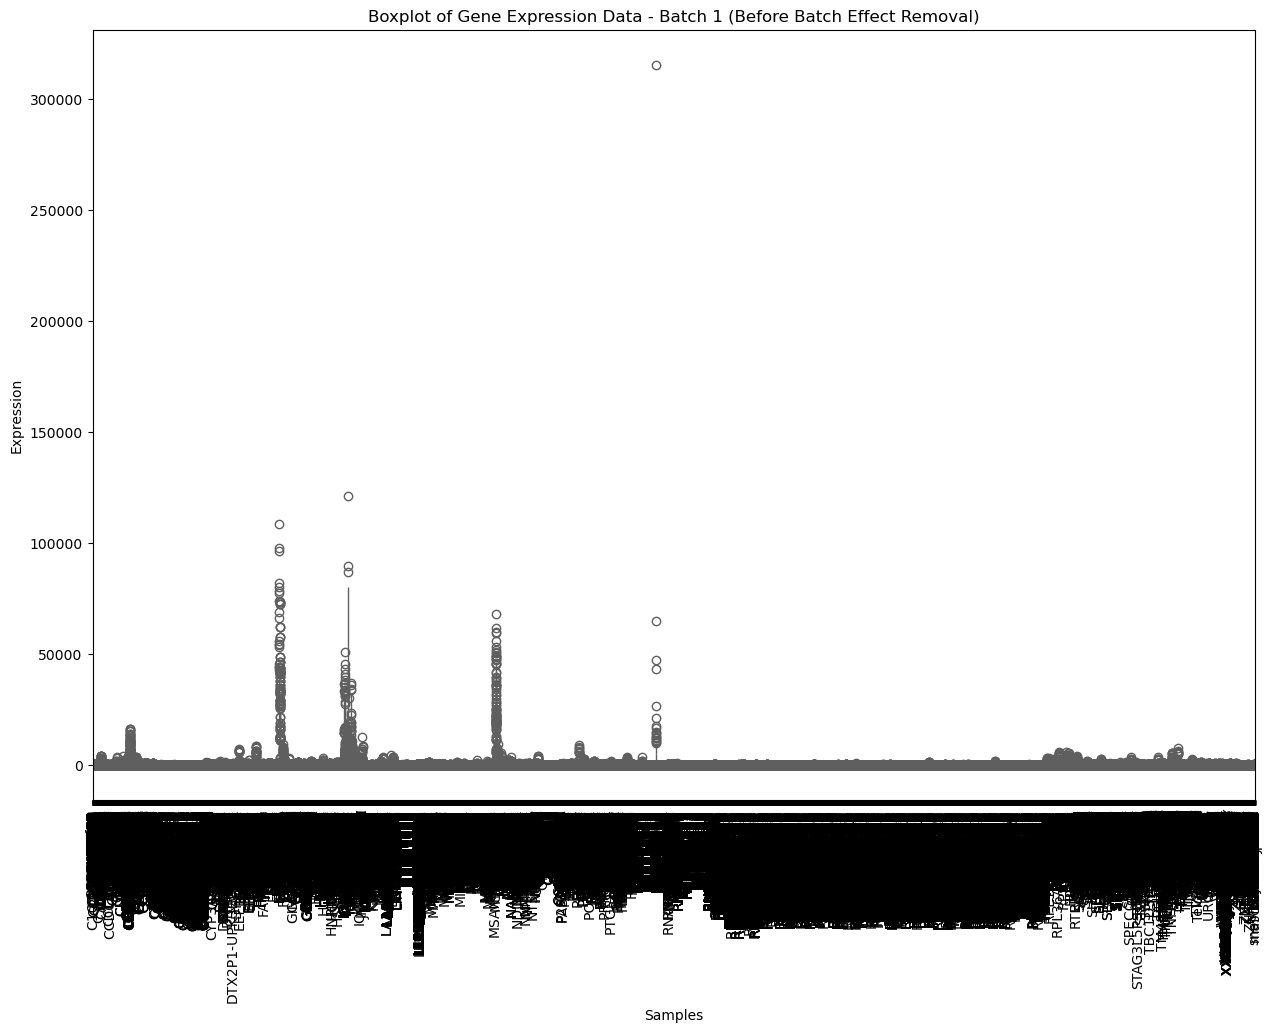

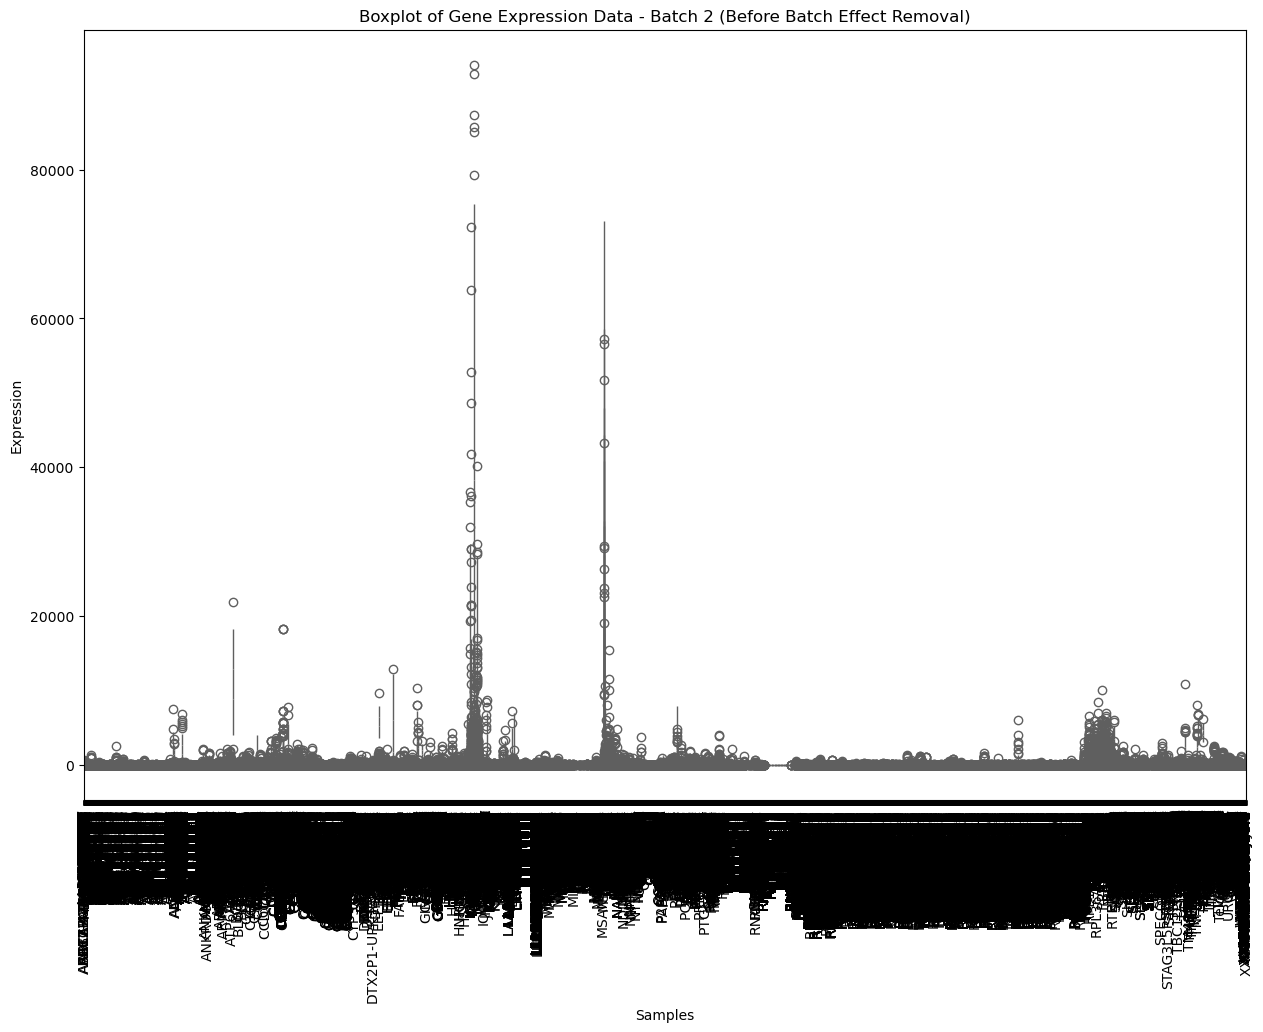

In [7]:
#Batch1
plt.figure(figsize=(15, 10))
sns.boxplot(data=batch1_data.T, palette="Set3")
plt.title('Boxplot of Gene Expression Data - Batch 1 (Before Batch Effect Removal)')
plt.xlabel('Samples')
plt.ylabel('Expression')
plt.xticks(rotation=90)
plt.show()

#Batch2
plt.figure(figsize=(15, 10))
sns.boxplot(data=batch2_data.T, palette="Set3")
plt.title('Boxplot of Gene Expression Data - Batch 2 (Before Batch Effect Removal)')
plt.xlabel('Samples')
plt.ylabel('Expression')
plt.xticks(rotation=90)
plt.show()

After the Batch Effect was removed:

In [9]:
batch1_fixed_data = scaled_combined_data.loc[:, [col for col, b in zip(scaled_combined_data.columns, batch) if b == 1]]
batch2_fixed_data = scaled_combined_data.loc[:, [col for col, b in zip(scaled_combined_data.columns, batch) if b == 2]]

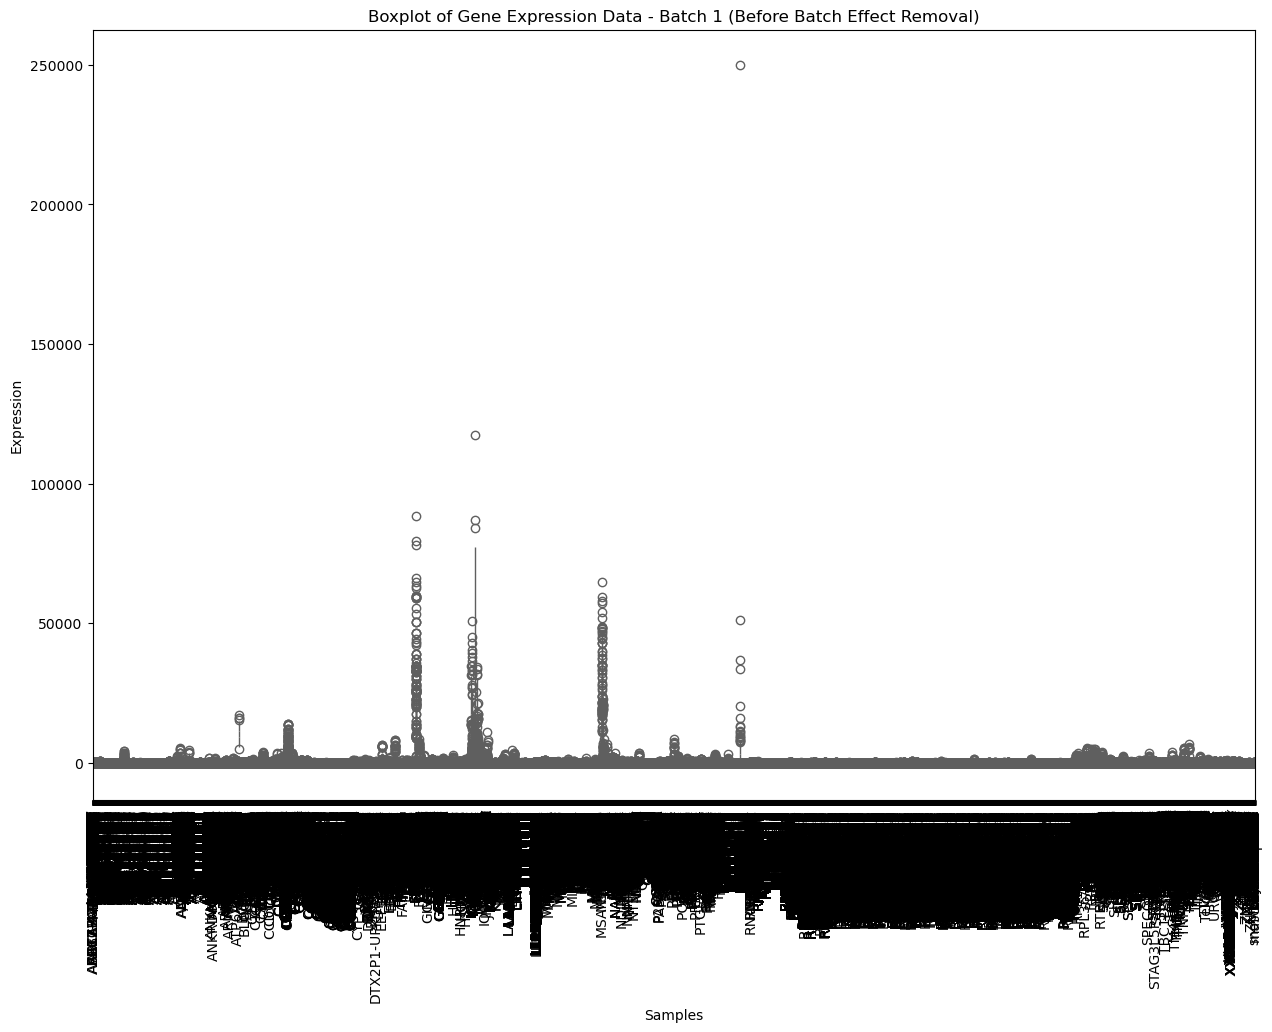

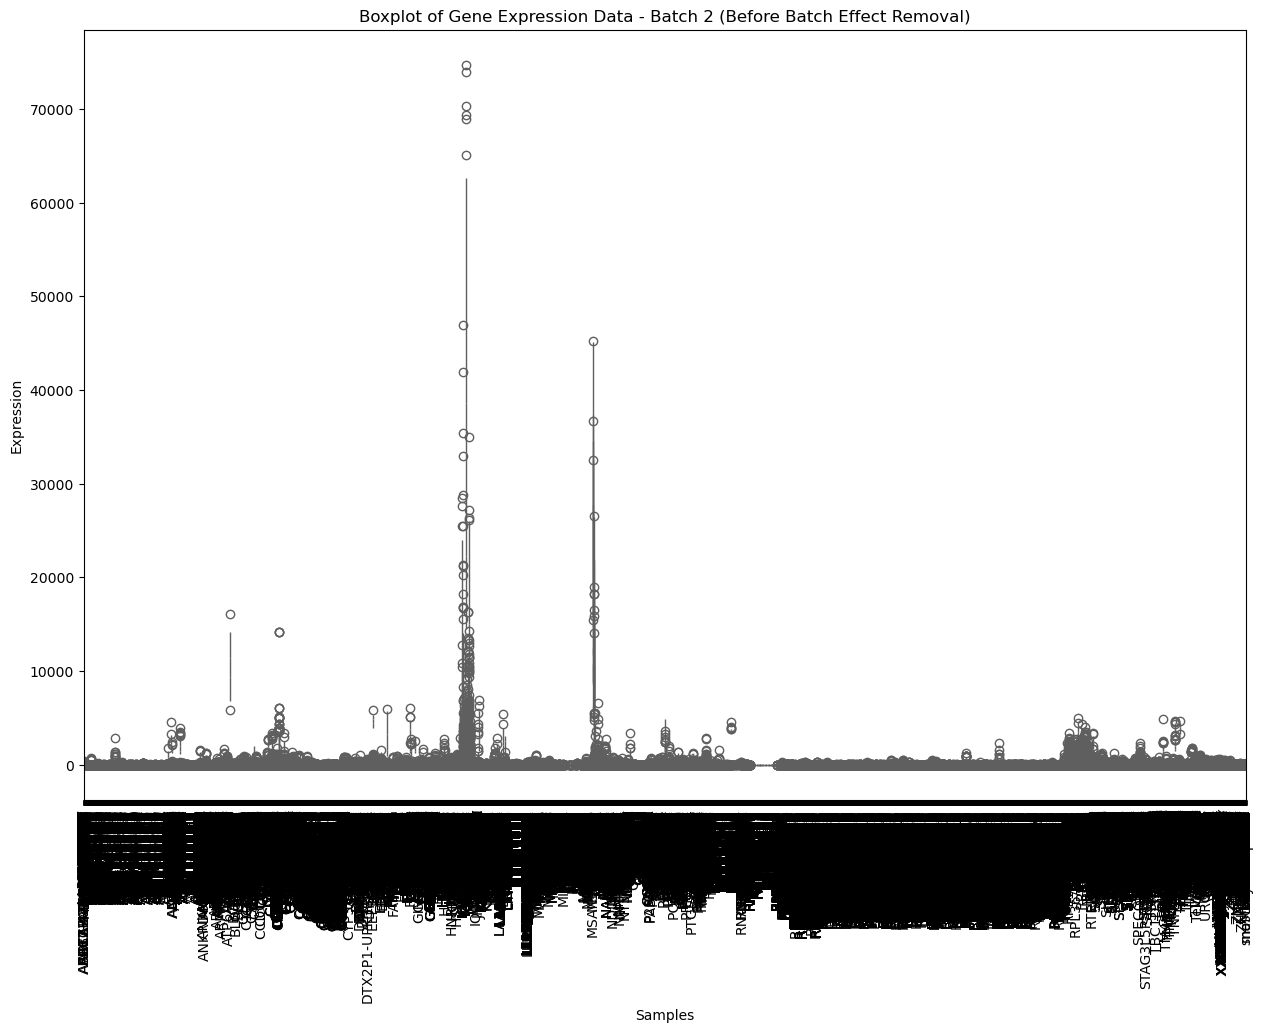

In [9]:
#Batch1
plt.figure(figsize=(15, 10))
sns.boxplot(data=batch1_fixed_data.T, palette="Set3")
plt.title('Boxplot of Gene Expression Data - Batch 1 (After Batch Effect Removal)')
plt.xlabel('Samples')
plt.ylabel('Expression')
plt.xticks(rotation=90)
plt.show()

#Batch2
plt.figure(figsize=(15, 10))
sns.boxplot(data=batch2_fixed_data.T, palette="Set3")
plt.title('Boxplot of Gene Expression Data - Batch 2 (After Batch Effect Removal)')
plt.xlabel('Samples')
plt.ylabel('Expression')
plt.xticks(rotation=90)
plt.show()

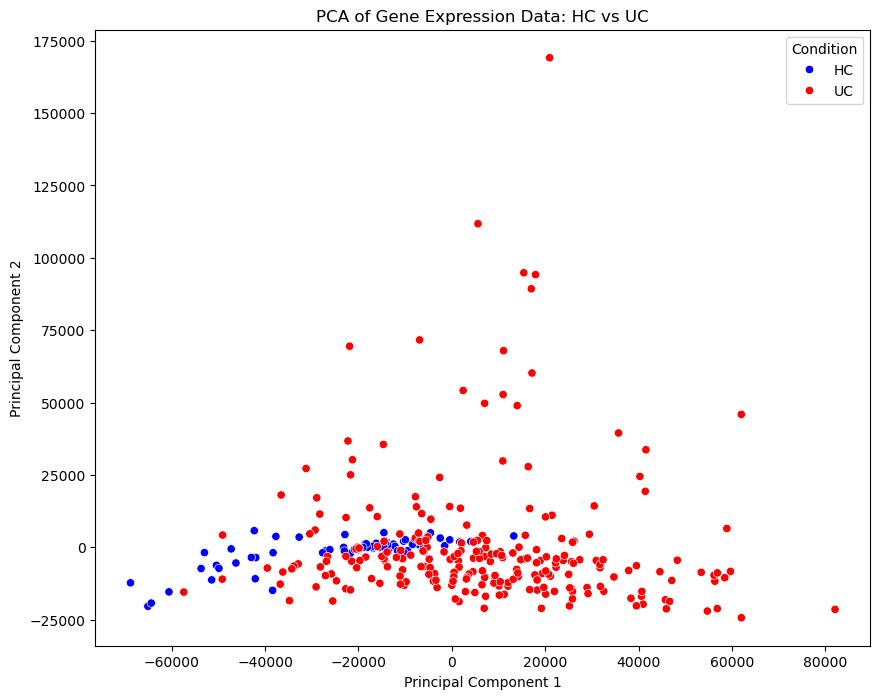

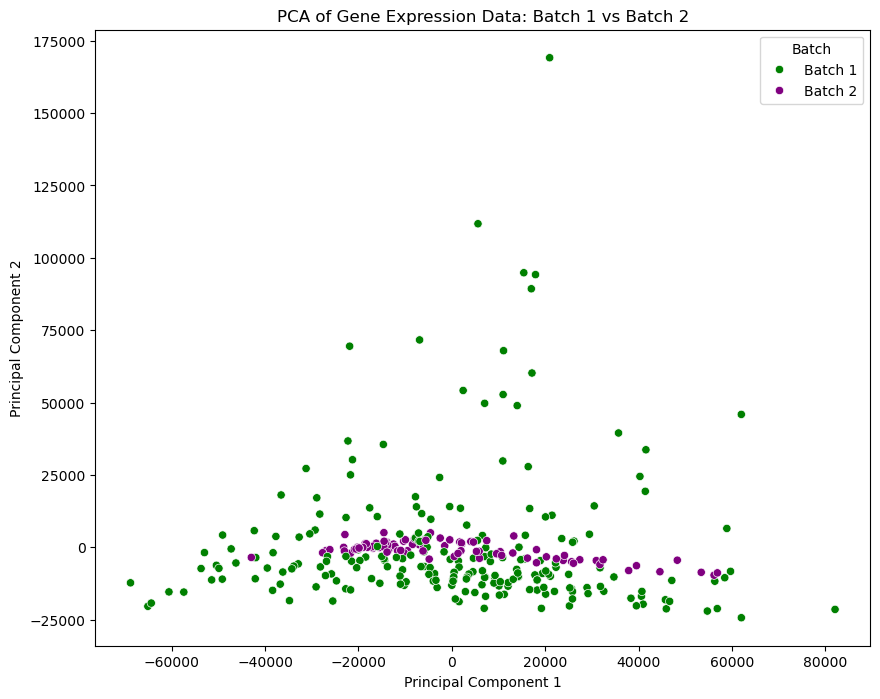

In [10]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_combined_data.T)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Sample'] = scaled_combined_data.columns
pca_df['Condition'] = ['HC' if col in hc_columns else 'UC' for col in scaled_combined_data.columns]
pca_df['Batch'] = ['Batch 1' if col.startswith('GSM2') else 'Batch 2' for col in scaled_combined_data.columns]

# HC vs UC
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Condition', data=pca_df, palette=['blue', 'red'])
plt.title('PCA of Gene Expression Data: HC vs UC')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Condition')
plt.show()

# Batch 1 vs Batch 2
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Batch', data=pca_df, palette=['green', 'purple'])
plt.title('PCA of Gene Expression Data: Batch 1 vs Batch 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Batch')
plt.show()

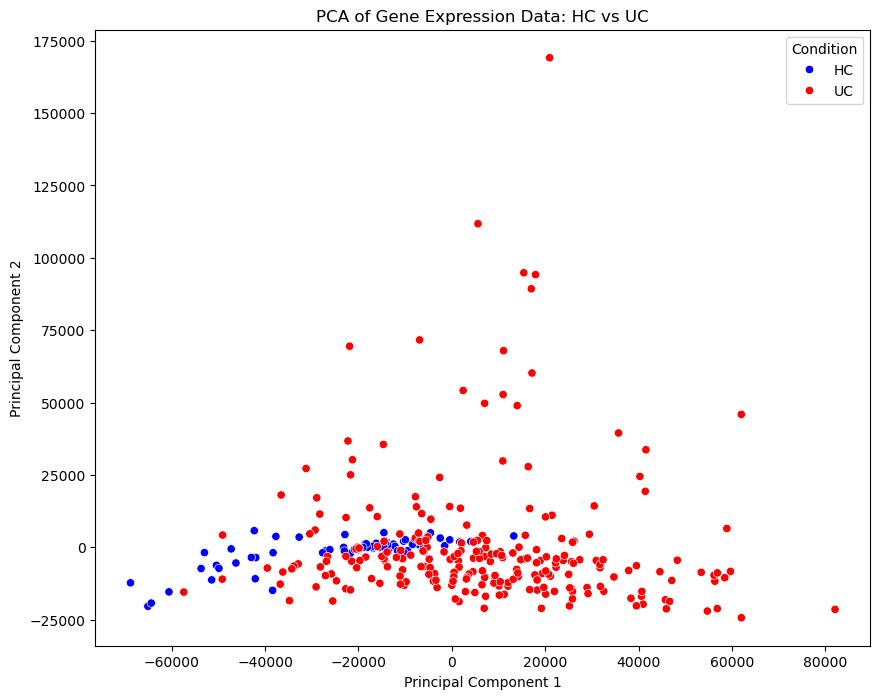

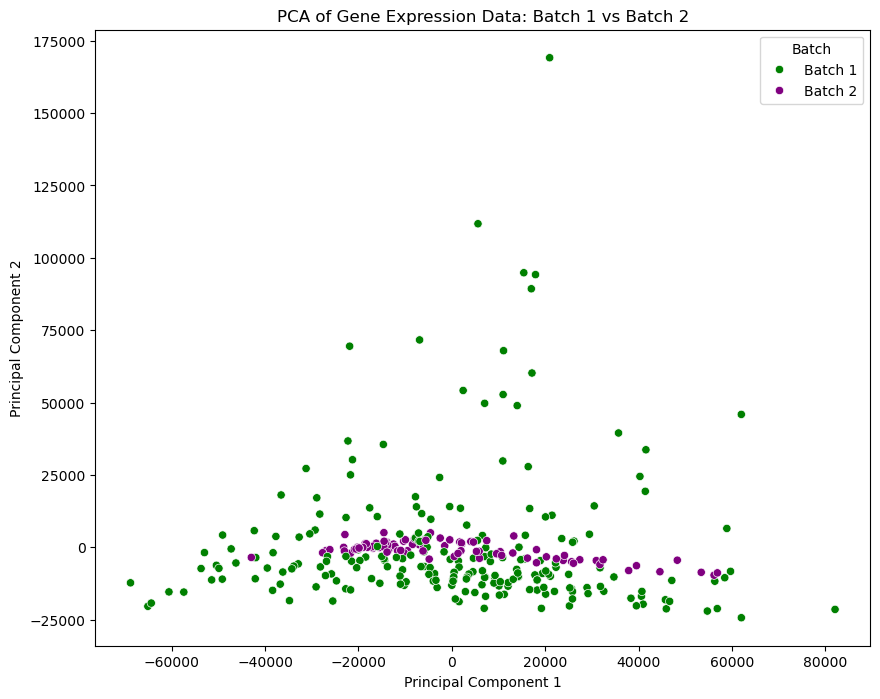

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_combined_data.T)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Sample'] = scaled_combined_data.columns
pca_df['Condition'] = ['HC' if col in hc_columns else 'UC' for col in scaled_combined_data.columns]
pca_df['Batch'] = ['Batch 1' if col.startswith('GSM2') else 'Batch 2' for col in scaled_combined_data.columns]

# HC vs UC
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Condition', data=pca_df, palette=['blue', 'red'])
plt.title('PCA of Gene Expression Data: HC vs UC')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Condition')
plt.show()

# Batch 1 vs Batch 2
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Batch', data=pca_df, palette=['green', 'purple'])
plt.title('PCA of Gene Expression Data: Batch 1 vs Batch 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Batch')
plt.show()

In [13]:
i2g = pd.read_csv('/Users/martinli/Desktop/SZ/i2g_df_gene_ppion.csv', index_col=0)
i2g_ppion = i2g[i2g['ppion'] == True]
i2g_initial = i2g[i2g['initial'] == True]
gene_names = set(i2g_initial['gene_name'])
scaled_combined_data = scaled_combined_data[scaled_combined_data.index.isin(gene_names)]
hc_columns = combined_hc_data.columns
uc_columns = combined_uc_data.columns
combined_hc_data = scaled_combined_data[hc_columns]
combined_uc_data = scaled_combined_data[uc_columns]
print(f"Filtered HC data dimensions: {combined_hc_data.shape}")
print(f"Filtered UC data dimensions: {combined_uc_data.shape}")
combined_hc_data.to_csv("/Users/martinli/Desktop/SZ/continous_hc.csv")
combined_uc_data.to_csv("/Users/martinli/Desktop/SZ/continous_uc.csv")

Filtered HC data dimensions: (16542, 74)
Filtered UC data dimensions: (16542, 246)
